# Multiple Linear Regression with Ethereum Stock Price

Building and evaluating a multiple regression model.

Main steps in the project:
- Loading the dataset
- Visualising the dataset
- Preparing the data for the model
- Confirming our hypothesis testing
- Preparing the model
- Training the model
- Evaluating the model

### Loading the dataset

Loads the 'Ethereum_Price_History_USD.csv' file as a DataFrame, using the 'SNo' as the index column

Then we will print the first 10 Rows in the 'Eth_Price_Data' DataFrame to ensure that everything is as expected.

In [1]:
import pandas as pd

# Loads the dataset
Eth_Price_Data = pd.read_csv('Ethereum_Price_History_USD.csv', index_col='SNo')

# Prints the first 10 Rows from the dataset
Eth_Price_Data.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
SNo,,,,,,,
1,2016-03-10,11.75,11.20,11.85,11.07,0.0,4.91
2,2016-03-11,11.95,11.75,11.95,11.75,180.0,1.70
3,2016-03-12,12.92,11.95,13.45,11.95,830.0,8.12
4,2016-03-13,15.07,12.92,15.07,12.92,1300.0,16.64
5,2016-03-14,12.50,15.07,15.07,11.40,92180.0,-17.05
6,2016-03-15,13.06,12.63,13.42,11.98,39730.0,4.48
7,2016-03-16,12.88,13.06,13.89,12.62,19240.0,-1.38
8,2016-03-17,10.74,12.58,12.61,10.44,89450.0,-16.61
9,2016-03-18,10.74,11.09,11.20,8.34,157370.0,0.00


In [2]:
print('Number of the days of Ethereum prices contained in the dataset: \n', len(Eth_Price_Data['Date']), 'days' )

Number of the days of Ethereum prices contained in the dataset: 
 1994 days


## Visualising the dataset

We will plot the dataset so we can figure out what we can do with the dataset.

In order to plot our Ethereum dataset we need to:
- Create a new DataFrame contining only the 'Date' and 'Price' Variables
- Creates a seperate DataFrame containing only the 'Date' variable
- Convert the 'Date' DataFrame to datetime
- Plot the final updated variables using matplotlib

Creating new DataFrame for plotting the Ethereum price history purposes only containing the 'Date' and 'Price' Variables as it won't affect the original dataset.

We will then seperate the 'Date' variables with a unique DataFrame to convert the variable to datetime which is needed for the 'autofmt_xdate()' functionused to make the plot more readable. 

Finally we can plot the complete dataset with the updated variables to observe the daily price for Ethereum since it entered the Stock exchange in 2016.

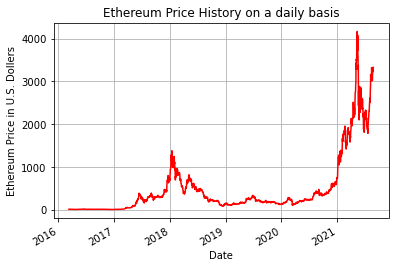

In [3]:
from matplotlib import pyplot as plt

## Styling the plots for the project
#plt.style.use(style="seaborn")
#%matplotlib inline

# Creates a new DataFrame containing only the 'Date' 
# and 'Price' Variables from the dataset
Plot_Eth_Price = pd.DataFrame(Eth_Price_Data, columns = ['Date', 'Price'])

# Creates a new DataFrame containing only the 'Date' variable
# from the above 'Plot_Eth_Price' DataFrame
Plot_Eth_Date = Plot_Eth_Price['Date']

# Converts the content in the 'Plot_Eth_Date' variable to 
# datetime. This is needed for the 'autofmt_xdate()' function 
# used to make the plot of the dataset more readable
Plot_Eth_Date = pd.to_datetime(Plot_Eth_Date)

plt.title('Ethereum Price History on a daily basis')
plt.xlabel('Date')
plt.ylabel('Ethereum Price in U.S. Dollers')
plt.grid(True)
plt.plot(Plot_Eth_Date, Plot_Eth_Price['Price'], color = 'red')
plt.gcf().autofmt_xdate()
plt.savefig('Ethereum_Price_History.png')

plt.show()

### Preparing the dataset for the Model

In order to prepare the data for the Regression model we will need remove the unwanted variables. In this case, we will remove 'Vol.' and 'Change'

We will also split the 'Eth_Price_Data'DataFrame to eventually create  training and testing set
- 'data_X' will contain all the columns except the 'Price'
- 'data_Y' will contain only the 'Price' column

In [4]:
# Creates a new DataFrame from the dataset that only contains the 
# 'Price', 'High', 'Low' and 'Open' Columns
Eth_Price_Data = Eth_Price_Data[['Price', 'High', 'Low', 'Open']].dropna()

# Split the 'Eth_Price_Data' DataFrame to eventually create 
# training and testing set
# 'data_X' will contain all the columns except the 'Price'
# 'data_Y' will contain only the 'Price' column
data_X = Eth_Price_Data.loc[:,Eth_Price_Data.columns !=  'Price' ]
data_Y = Eth_Price_Data['Price']

### Hypothesis testing

One of the main question that needs to be answered before applying Multiple Linear Rgression to a dataset is, does at least one of the indepedent varibales help us in predicting the output.

Just a brief over

$H_0$: The 'Price' of the crypotocurrency Ethereum at any given day cannot be predicted by the 'Open', 'High' and 'Low' variables from our dataset for that day. The variables refer to the Opening Price, Highest Price and Lowest Price of Ethereum on that day.

$$H_0: \beta_1 = \beta_2 = \beta_3 = 0$$

$H_A$: The 'Price' of the crypotocurrency Ethereum at any given day cannot be predicted by the 'Open', 'High' and 'Low' variables from our dataset for that day.

$$H_A: \text{At least one } \beta_i \text{ is non-zero}$$

To perform a hypothesis test on the dataset, we will use the f_regression:

In [5]:
# Imports the 'f_regression' function which computes the F statistics
from sklearn.feature_selection import f_regression

(F_statistic, p_values) = f_regression(data_X, data_Y)

<b>Note:</b>

$\beta_1$ refers to the 'High' Variable influence on the model

$\beta_2$ refers to the 'Low' Variable influence on the model

$\beta_3$ refers to the 'Open' Variable influence on the model

In [6]:
print('P-value for beta_1:        ', p_values[0])
print('P-value for beta_2:        ', p_values[1])
print('P-value for beta_3:        ', p_values[2])

P-value for beta_1:         0.0
P-value for beta_2:         0.0
P-value for beta_3:         0.0


The p-values are used for hypothesis test. The 'High', 'Low' and 'Open' variables have a statistically significant p-value. 

The p-value for all the coefficients either 0 so we can reject the null hypothesis. This basically proves that there is a relationship between the 'High', 'Low' and 'Open' variables can be used to predict the 'Price' of Ethereum on that day.

### Splitting the dataset into training and testing set.

Scikit Learn has a function 'train_test_split' which we will use to split the dataset into two categories: training and testing set. It will create four seperarte arrays based on these splits:  train_X, test_X, train_Y, test_Y.

In this case, we are randomly putting 75% of the dataset into the training set and the remaining 25% into our testing set. The random nature in this process helps to vary the type of data in each set.

In [7]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing set
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=0.25, random_state=0)

### Training the model with our Training set

Implementing linear regression with Scikit learn to the training set from our dataset. 

The 'LinearRegression' function fits the linear model with coefficients ($\beta_1, ..., \beta_p$) to minimise the residual sum of squares between the outputs and the independent variables in the dataset.

Here we create a Linear Regressor model object and subsequently trains our regression model with our training set with the fit() method.

In [8]:
from sklearn.linear_model import LinearRegression

# Trains the model on our training dataset
regressor = LinearRegression()
regressor.fit(train_X,train_Y)

LinearRegression()

Our final linear regression model will be:

$ price = \beta_0  + \beta_1 . High + \beta_2 . Low + \beta_3. Open$

where

$ \beta_0 $ is the intercept

and

$ \beta_1 $, $ \beta_2 $ and $ \beta_3 $ are the coefficients

### Testing the model with our Testing set

We will now test our model to predict the values for our testing set. This is done with the '.predict' method from Scikit-Learn.

Once our model has finished predicting the price values, we can measure the performance the accuracy of the model using Scikit-Learn's 'r2_score' function.

In [9]:
import numpy as np

# Use the model to predict the values for our testing set
predict_Y = regressor.predict(test_X)

print('Accuracy score with our test set: ' , regressor.score(test_X,test_Y))

## The intercept is the expected mean value of Y when all X=0
print('Intercept: ', regressor.intercept_)

# Coefficient are the weights
print('Coefficients: \n')
print(regressor.coef_)

print('')

coefficients = pd.DataFrame(regressor.coef_, train_X.columns, columns=['Coefficient'])
coefficients 


Accuracy score with our test set:  0.9992289474063466
Intercept:  -0.1380558838586694
Coefficients: 

[ 0.92015022  0.65675643 -0.58033529]



,Coefficient
High,0.920150
Low,0.656756
Open,-0.580335


From our results, the 'High' variables has the greatest influence on the price of Ethereum on a given day as it has a $\beta$ coefficient of over 0.9.

The model appears to perform really well with a $R^2$ score of over 99% which indicates that the model is relatively good at predicting Ethereums price give the highest price, lowest price and opening price on a given day.

### Evaluating the model

Evalulating the model is essential in understanding the perdormance for both the user and developer.

The evaluation metrics used in the project:
- Coefficient of Deterimintion on testing set
- Mean Squared Error (MSE)/Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- Adjusted R2 Squared

Below, we will use Scikit-Learns '.metrics' method to easily canculate the models metrics.

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


# Calculates the mean absolute error of our model
meanAbError = mean_absolute_error(test_Y, predict_Y)

meanPerAbError = mean_absolute_percentage_error(test_Y, predict_Y)

# Calculates the mean squared error of our model
meanSqError = mean_squared_error(test_Y, predict_Y)

# Calculates the R2 score of our model
r2 = r2_score(test_Y, predict_Y) # R2 Score

# Calculates the adjusted R2 score of our  model
n = len(test_X)        # Number of data points in our testing set
p = 3                  # Number of independent variables used in model
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print('Coefficient of Determination on training: ', r2)
print('Mean Squared Error:                       ', meanSqError)
print('Root Mean Squared Error:                  ', np.sqrt(meanSqError))
print('Mean Absolute Error:                      ', meanAbError)
print('Adjusted R2 Squared:                      ', adjusted_r2)

print('Mean Absolute Percentage Error:           ', meanPerAbError)

Coefficient of Determination on training:  0.9992289474063466
Mean Squared Error:                        391.1387125906281
Root Mean Squared Error:                   19.77722712087385
Mean Absolute Error:                       8.096399055124106
Adjusted R2 Squared:                       0.9992242743603245
Mean Absolute Percentage Error:            0.01635415475872566


The model performs pretty well on our dataset.

- The $R^2$ metric for the model on the training set is 0.99922 which indicates that it is really likely that the output will be close to the predicted value.
- The Root Mean Squared Error is over double the Mean Absolute Error metric which would lead us to the conclusion that the model predicted the price under what it actually was. This would be that if our model trading each day, it would have made a profit more then it would have lost money.

<b>Residual Plots</b>

Residual plots are useful for visualising the errors in your data. If you did a good job your data should be randomly scattered around line zero.

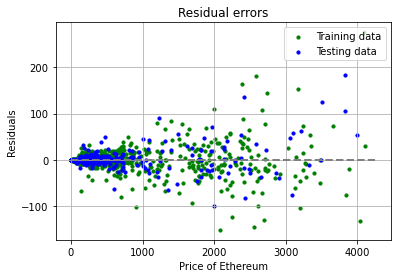

In [13]:
# Plotting the residual error
# Plotting the rediual errors in the training data
plt.scatter(regressor.predict(train_X), regressor.predict(train_X) - train_Y, color = 'green', s = 10, label = 'Training data')

# Plotting the rediual errors in the testing data
plt.scatter(regressor.predict(test_X), regressor.predict(test_X) - test_Y, color = 'blue', s = 10, label = 'Testing data')

# Plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 4250, linewidth = 2, linestyles = '--', color = 'gray')

plt.legend(loc = 'upper right')
plt.title('Residual errors')
plt.xlabel('Price of Ethereum')
plt.ylabel('Residuals')
plt.grid(True)

plt.show()

The residual errors are larger as the price of Ethereums grows in value. This is underdstandable as higher values of the price have a larger error even with the same performance from the model.

Toward the end of the plot, it shows that the model makes less accurate predictions as the price of ethereum increases. This is most likely due to the fact that the price of Ethereum drastically increased on a short period of time. For example, the price of Ethereum grow by over 25 times in a period of 14 months which is unprecedented starting from the March 2020. It would be unrealistic for our model to be able to adjust for such a change appropriately.

<b>We will plot both the 'Open' price and Predicted price vs the closing price.</b>

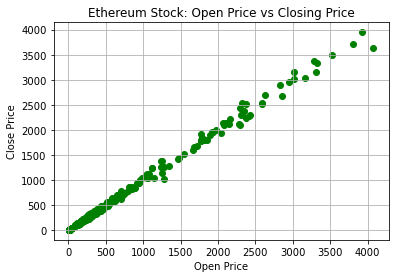

In [14]:
# Plot the opening price values and the closing price values

plt.title('Ethereum Stock: Open Price vs Closing Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.scatter(test_X['Open'], test_Y, marker='o', c= 'green');

plt.show()

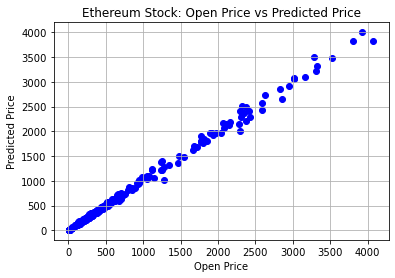

In [15]:
# Plot the predicted and the expected values

plt.title('Ethereum Stock: Open Price vs Predicted Price')
plt.xlabel('Open Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.scatter(test_X['Open'], predict_Y, marker='o', c='blue');
plt.show()

Both plots are done seperately because the data overlaps too much. It just goes to show how similar they are.

Finally, we will create a new DataFrame containing all the actual prices and the predicted prices in our testing set.

In [16]:
model_result = pd.DataFrame({'Actual Price' :test_Y, 'Predicted Price' :predict_Y, 'Difference' :predict_Y-test_Y })

model_result

,Actual Price,Predicted Price,Difference
SNo,,,
1806,1847.95,1810.929726,-37.020274
1312,179.87,182.226820,2.356820
961,204.58,207.129645,2.549645
108,14.31,14.301431,-0.008569
1558,232.02,232.441585,0.421585
...,...,...,...
1410,174.19,174.662326,0.472326
1617,387.12,379.091575,-8.028425
1175,271.18,270.377493,-0.802507


In [17]:
print('Number of days of data in our test set:          ', len(test_Y))
print('Sum of the Differences between our Predicted') 
print('Prices and Acutal Prices:                        ', sum(model_result['Difference']))

# Calculates the average difference between the predicted
# price and the actual price
avg_diff = sum(model_result['Difference']) / len(model_result['Difference'])

print('Average Difference between the predicted')
print('Price and the Actual Price:                       ', avg_diff)

Number of days of data in our test set:           499
Sum of the Differences between our Predicted
Prices and Acutal Prices:                         738.8763100542479
Average Difference between the predicted
Price and the Actual Price:                        1.4807140482049057


The model suggests that the high-price, low-price and open-price are indicative of the closing price of the same day. Based on the found coefficients, we conclude that the high-price is most influential on the closing price.

-------------------------------------------------------

## Testing of our model with a validation set

Further testing of our model with a validation set will elaborate the usefullness of the model for predicting the price of Ethereum at a more current period of time. 

In [18]:
# Loading the validation set 'Ethereum_Validation_Set.csv'
validation_set = pd.read_csv('Ethereum_Validation_Set.csv')

# Issolating the actual price of the data in the 
# validation set
validation_actual_output = validation_set['Price']

# Prints the first 15 rows from the validation
validation_set.head(15)

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-11-13,4688.46,4665.76,4705.02,4585.37,377110,0.45%
1,2021-11-12,4667.31,4720.50,4807.16,4511.96,634590,-1.13%
2,2021-11-11,4720.87,4633.98,4778.17,4578.66,418610,1.87%
3,2021-11-10,4634.03,4731.83,4864.06,4498.78,761900,-2.07%
4,2021-11-09,4731.83,4808.34,4836.69,4715.43,437410,-1.59%
5,2021-11-08,4808.38,4612.05,4822.97,4612.05,673210,4.26%
6,2021-11-07,4612.06,4517.27,4634.39,4502.70,337810,2.10%
7,2021-11-06,4517.36,4475.00,4526.75,4330.29,442600,0.95%
8,2021-11-05,4475.00,4534.96,4569.31,4439.67,409750,-1.33%
9,2021-11-04,4535.11,4601.93,4604.83,4421.87,495860,-1.46%


In [19]:
# Loading the validation set 
# Removing all the unnecessary columns from the validation set
validating_set = pd.DataFrame(validation_set[['High', 'Low', 'Open']])

# Use the original model to predict the 'Price' of
# of Ethereum on new dates
validation_Y = regressor.predict(validating_set)

# Creates a new DataFrame containing all the results from our model
validation_result = pd.DataFrame({'Date' :validation_set['Date'], 'Actual Price' :validation_actual_output, 'Predicted Price' :validation_Y, 'Difference' :validation_Y-validation_actual_output })

validation_result

,Date,Actual Price,Predicted Price,Difference
0,2021-11-13,4688.46,4632.953195,-55.506805
1,2021-11-12,4667.31,4646.957295,-20.352705
2,2021-11-11,4720.87,4714.298404,-6.571596
3,2021-11-10,4634.03,4684.082594,50.052594
4,2021-11-09,4731.83,4756.782911,24.952911
5,2021-11-08,4808.38,4790.176984,-18.203016
6,2021-11-07,4612.06,4599.842918,-12.217082
7,2021-11-06,4517.36,4412.097344,-105.262656
8,2021-11-05,4475.00,4488.298053,13.298053
9,2021-11-04,4535.11,4470.426469,-64.683531


In [20]:
val_r2 = r2_score(validation_actual_output, validation_Y) # R2 Score
print('R2 Score of model on the validation set: ' , val_r2)

R2 Score of model on the validation set:  0.9199773264059619


Getting some more information about our results:

In [21]:
print('Number of days of data in our validation set:     ', len(validating_set['High']))
print('Sum of the Differences between the Predicted')
print('Price and Acutal Price:                           ', sum(validation_result['Difference']))

# Calculates the average difference between the predicted
# price and the actual price
avg_diff = sum(validation_result['Difference']) / len(validation_result['Difference'])

print('Average Difference between the predicted')
print('price and the acutal Price:                       ', avg_diff)

Number of days of data in our validation set:      16
Sum of the Differences between the Predicted
Price and Acutal Price:                            -364.66181517900804
Average Difference between the predicted
price and the acutal Price:                        -22.791363448688003


In [22]:
# Calculates the mean absolute error of our model
val_meanAbError = mean_absolute_error(validation_actual_output, validation_Y)

val_meanPerAbError = mean_absolute_percentage_error(validation_actual_output, validation_Y)

# Calculates the mean squared error of our model
val_meanSqError = mean_squared_error(validation_actual_output, validation_Y)

# Calculates the R2 score of our model
val_r2 = r2_score(validation_actual_output, validation_Y) # R2 Score

# Calculates the adjusted R2 score of our  model
n = len(validation_actual_output)        # Number of data points in our testing set
p = 3                                    # Number of independent variables used in model
val_adjusted_r2 = 1 - ((1-val_r2) * (n-1) / (n-p-1))

print('Coefficient of Determination on training: ', val_r2)
print('Mean Squared Error:                       ', val_meanSqError)
print('Root Mean Squared Error:                  ', np.sqrt(val_meanSqError))
print('Mean Absolute Error:                      ', val_meanAbError)
print('Adjusted R2 Squared:                      ', val_adjusted_r2)

print('Mean Absolute Percentage Error:           ', val_meanPerAbError)

Coefficient of Determination on training:  0.9199773264059619
Mean Squared Error:                        1877.7538960779648
Root Mean Squared Error:                   43.33305777438242
Mean Absolute Error:                       34.44972823008095
Adjusted R2 Squared:                       0.8999716580074524
Mean Absolute Percentage Error:            0.0075649261190462985


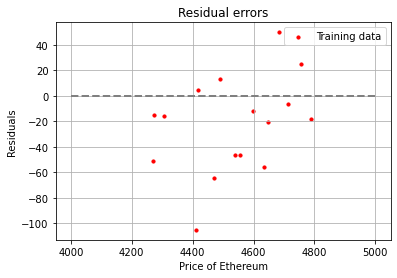

In [24]:
# Plotting the residual error
# Plotting the rediual errors in the validation data
plt.scatter(regressor.predict(validating_set), regressor.predict(validating_set) - validation_actual_output, color = 'red', s = 10, label = 'Training data')

# Plotting line for zero residual error
plt.hlines(y = 0, xmin = 4000, xmax = 5000, linewidth = 2, linestyles = '--', color = 'gray')

plt.legend(loc = 'upper right')
plt.title('Residual errors')
plt.xlabel('Price of Ethereum')
plt.ylabel('Residuals')
plt.grid(True)

plt.show()

Which isn't good, do better model.

Don't put your money into this sort of thing.

Maybe would have faired better if it was trained on less data or more current data

Precision need of gives us weird results. 

When test the model with a validation set, things to note:
- Doesn't perform as well as we taught possibly due to the large range of prices in the original dataset in comparison to the to the validation.
- A 97% accurate model performs a lot different when the Ethereum price is over $\$3000$ as an error means a larger value. This could be too big of an error for a person to trust the model with their hard-earned money. On the 6th of November, the models predicted values was over $\$100$ lower then the actual value which is a significant loss if you were to use the model when investing.

---------------------------------------------------------------------

### To conclude

The model suggests that the 'high' price, 'low' price, and opeining price are indicative of the closing price.

The purpose of the project was to

as all the data is released at the same time. 

We did not find a big difference when using adjusted $R^2$

Possible improvements:
- Possibly the model would have performed better if it was trained on less quantity of data colleeted at recent date.